# Casos de test generados aleatoriamente

In [3]:
import random
random.seed(2019)

In [3]:
def crear_test(n):
    pares = list()
    for i in range(n):
        w, r = random.randint(1, 30), random.randint(1, 50)
        pares.append([w, r])
    return pares

In [4]:
ns = list(range(1,31,1))
resistencias = [1, 10, 20, 50, 75, 100]

In [6]:
with open('tests3_tp1.txt', 'a') as file:
    for r in resistencias:
        for n in ns:
            file.write("{} {}\n".format(n, r))
            for p in crear_test(n):
                file.write("{} {}\n".format(p[0], p[1]))
            file.write("\n")

# Casos de test del peor caso de BTF generados automaticamente

In [16]:
def crear_peor_caso(n,r):
    # R >= n
    return [[1,r+1] for i in range(n)]

In [17]:
peores_casos_n = list(range(10, 31, 1))
peores_casos_r = [10, 20, 50, 75, 100]

In [22]:
k=0

In [23]:
with open('worse_case.txt', 'a') as file:
    for r in peores_casos_r:
        for n in peores_casos_n:
            if r >= n:
                k+=1
                file.write("{} {}\n".format(n, r))
                for _w, _r in crear_peor_caso(n,r):
                    file.write("{} {}\n".format(_w, _r))
                file.write("\n")

In [24]:
k

75

## Casos de test del peor caso de PD

In [16]:
def crear_peor_caso(n,r):
    # R >= n
    return [[1,r+1] for i in range(n)]

# Analisis

## - Performance de cada uno
## - Comparacion entre ellos

In [4]:
from matplotlib import pyplot as plt, cm
import numpy as np
import pandas as pd
import seaborn as sns

## Graficos y demas
### FB

In [6]:
results_fb = pd.read_csv('resultados/results_fb.txt', delimiter=' ')
results_fb['esperado'] = 2 ** results_fb['n'] * 19 / 1000000
results_fb['ms'] = results_fb['t'] / 1000000

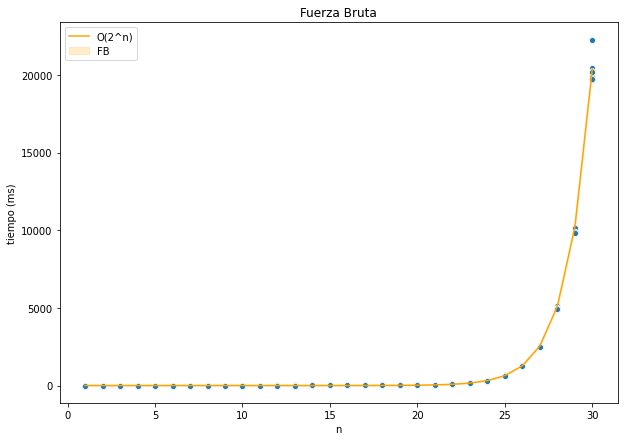

In [169]:
y = results_fb.ms.tolist()
x = results_fb.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.lineplot(data=results_fb, x='n', y='esperado', color="orange")
fig_fb = sns.scatterplot(x, y)
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Fuerza Bruta", xlabel='n', ylabel='tiempo (ms)')
plt.savefig('img/fb_vs_est')

### Correlacion entre t_ej y t_esp

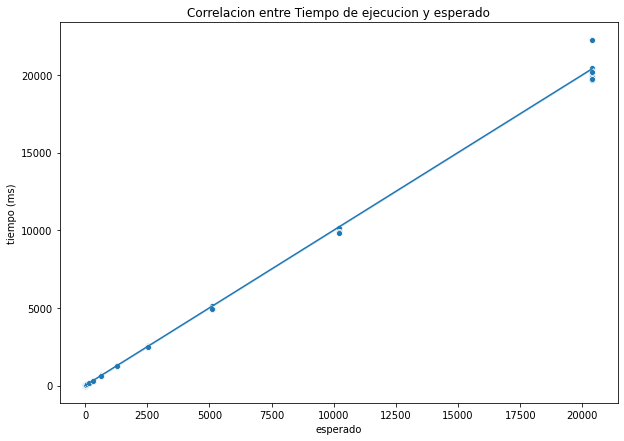

In [174]:
plt.figure(figsize=(10, 7))
fig_fb = sns.lineplot(results_fb['esperado'], results_fb['esperado'])
fig_fb = sns.scatterplot(results_fb['esperado'], results_fb['ms'])
fig_fb.set(title="Correlacion entre Tiempo de ejecucion y esperado", xlabel='esperado', ylabel='tiempo (ms)')
plt.savefig('img/fb_corr')

In [175]:
results_fb['ms'].corr(results_fb['esperado'])

0.9996350929563

---
## BTF

In [162]:
results_btf = pd.read_csv('resultados/results_btf.txt', delimiter=' ')
results_btf['esperado'] = (2 ** results_btf['n']) * 0.000000005
results_btf['ms'] = results_btf['t'] / 1000000

[Text(0, 0.5, 'tiempo (ms)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Backtracking Factibilidad')]

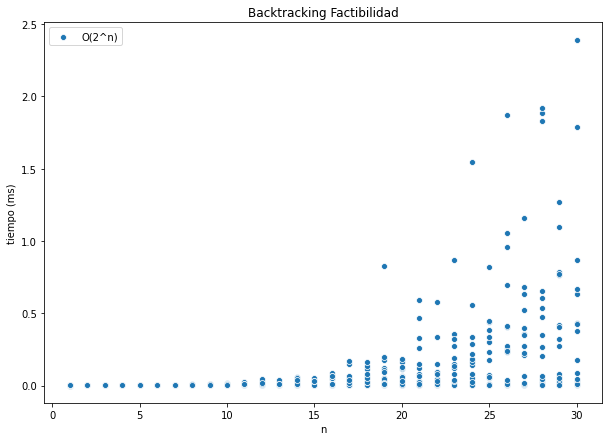

In [178]:
y = results_btf.ms.tolist()
x = results_btf.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
# fig_fb = sns.lineplot(data=results_btf, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ms)')

---
## BTO

In [33]:
results_bto = pd.read_csv('resultados/results_bto.txt', delimiter=' ')
results_bto['esperado'] = 2 ** results_bto['n'] * 0.01/1000000
results_bto['ms'] = results_bto['t'] / 1000000

[Text(0, 0.5, 'tiempo (ms)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Backtracking Factibilidad')]

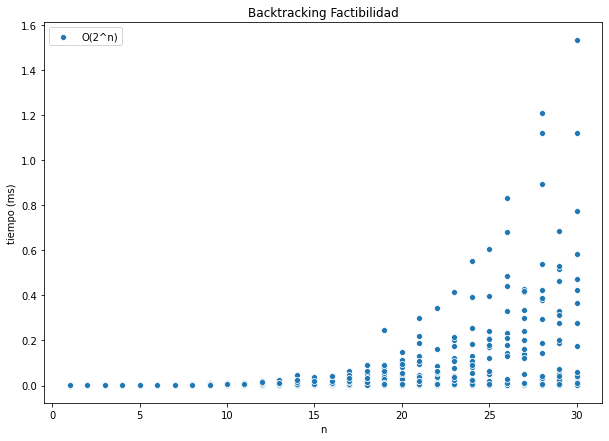

In [71]:
y = results_bto.ms.tolist()
x = results_bto.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
# fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ms)')

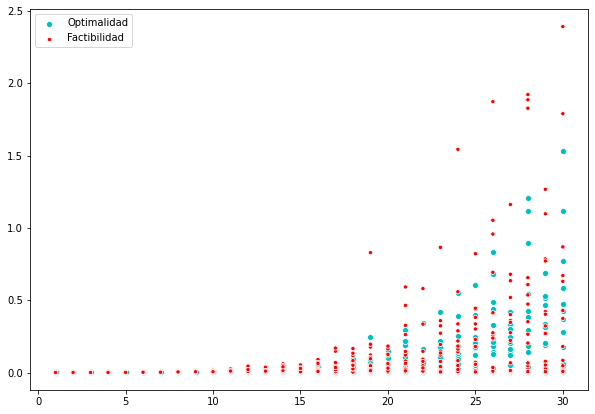

In [228]:
y_bto = results_bto.ms.tolist()
x_bto = results_bto.n.tolist()
y_btf = results_btf.ms.tolist()
x_btf = results_btf.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x_bto, y_bto, alpha=1, color='c')
fig_fb = sns.scatterplot(x_btf, y_btf, alpha=1, color='r',size=pd.Series([100 for i in range(0,len(x_btf))]))
# fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['Optimalidad','Factibilidad'])
plt.savefig('img/bt_comp_both')
# fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ms)')

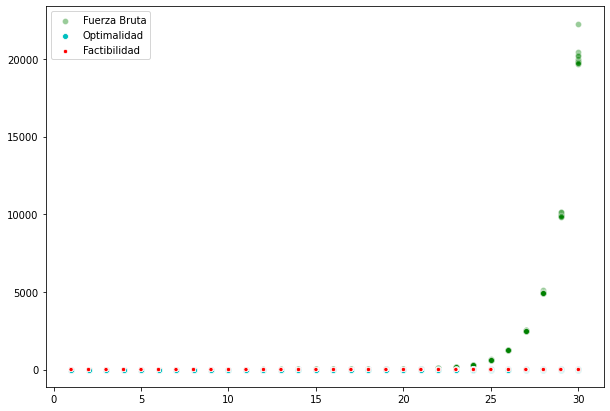

In [242]:
y = results_fb.ms.tolist()
x = results_fb.n.tolist()
y_bto = results_bto.ms.tolist()
x_bto = results_bto.n.tolist()
y_btf = results_btf.ms.tolist()
x_btf = results_btf.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y, alpha=0.4, color='g')
fig_fb = sns.scatterplot(x_bto, y_bto, alpha=1, color='c')
fig_fb = sns.scatterplot(x_btf, y_btf, alpha=1, color='r',size=pd.Series([100 for i in range(0,len(x_btf))]))
# fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['Fuerza Bruta','Optimalidad','Factibilidad'])
plt.savefig('img/bt_comp_fb')
# fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ms)')

---
## PD

In [45]:
results_pd = pd.read_csv('resultados/results_dp.txt', delimiter=' ')
results_pd['esperado'] = results_pd['n'] * results_pd['r'] * 44 / 1000000
results_pd['ms'] = results_pd['t'] / 1000000

### Tiempo de ejecucion vs esperada

[Text(0, 0.5, 'tiempo (ms)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Programacion dinamica')]

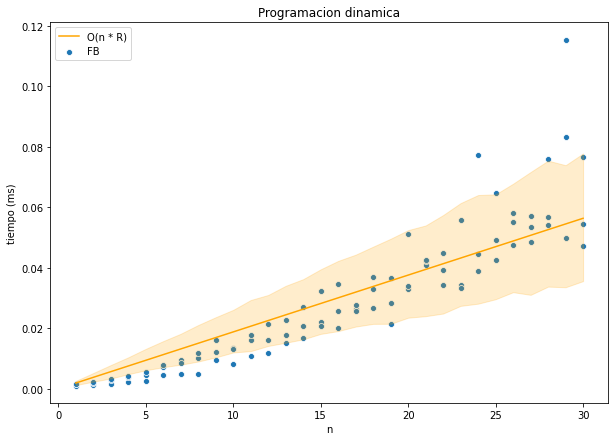

In [46]:
y = results_pd.loc[results_pd.r==100].ms.tolist()
x = results_pd.loc[results_pd.r==100].n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
fig_fb = sns.lineplot(data=results_pd, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(n * R)','FB'])
fig_fb.set(title="Programacion dinamica", xlabel='n', ylabel='tiempo (ms)')

### Correlacion entre tiempo de ejecucion y esperada

---
---

## Comparacion entre todos

In [ ]:
1000000

In [10]:
results_fb['ms'] = results_fb['t'] / 1000000

In [12]:
results_fb.tail(10)

,test_set,n,r,res,t,esperado,ms
530,3,21,100,6,38452867,41943040,38.452867
531,3,22,100,6,76823127,83886080,76.823127
532,3,23,100,6,159541372,167772160,159.541372
533,3,24,100,10,308220422,335544320,308.220422
534,3,25,100,7,615333431,671088640,615.333431
535,3,26,100,6,1230566372,1342177280,1230.566372
536,3,27,100,7,2462944888,2684354560,2462.944888
537,3,28,100,7,4922852697,5368709120,4922.852697
538,3,29,100,9,9848897174,10737418240,9848.897174
539,3,30,100,6,19705838379,21474836480,19705.838379


In [264]:
results_bto = pd.read_csv('resultados/results_bto.txt', delimiter=' ')
results_bto['esperado'] = (2 ** results_bto['n']) * 0.03/1000000
results_bto['inferior'] = results_bto['n'] * 0.05/1000000
results_bto['ms'] = results_bto['t'] / 1000000

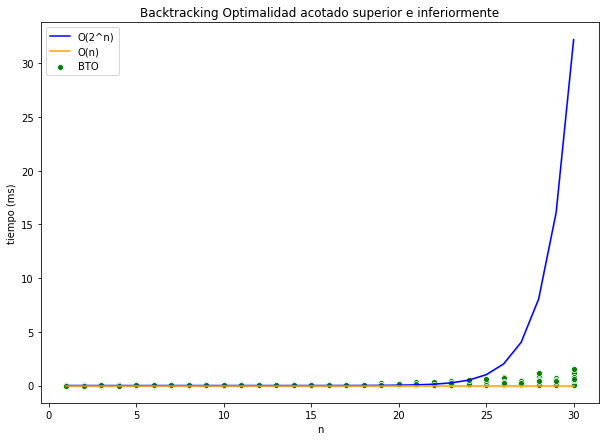

In [266]:
y = results_bto.ms.tolist()
x = results_bto.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y, color='g')
fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="b")
fig_fb = sns.lineplot(data=results_bto, x='n', y='inferior', color="orange")
fig_fb.legend(labels=['O(2^n)','O(n)','BTO'])
fig_fb.set(title="Backtracking Optimalidad acotado superior e inferiormente", xlabel='n', ylabel='tiempo (ms)')
plt.savefig('img/bto_acotado')

---

In [271]:
results_btf = pd.read_csv('resultados/results_btf.txt', delimiter=' ')
results_btf['esperado'] = (2 ** results_btf['n']) * 0.06/1000000
results_btf['inferior'] = results_btf['n'] * 0.06/1000000
results_btf['ms'] = results_btf['t'] / 1000000

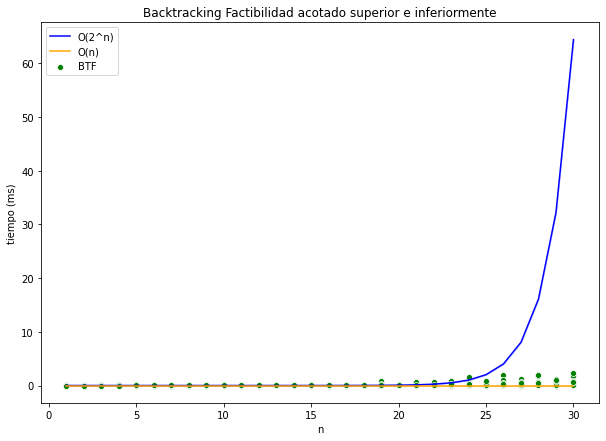

In [272]:
y = results_btf.ms.tolist()
x = results_btf.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y, color='g')
fig_fb = sns.lineplot(data=results_btf, x='n', y='esperado', color="b")
fig_fb = sns.lineplot(data=results_btf, x='n', y='inferior', color="orange")
fig_fb.legend(labels=['O(2^n)','O(n)','BTF'])
fig_fb.set(title="Backtracking Factibilidad acotado superior e inferiormente", xlabel='n', ylabel='tiempo (ms)')
plt.savefig('img/btf_acotado')